In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('weather2.csv')
df.head()

,Temp_C,Rel Hum_%,Wind Speed_km/h,Press_kPa,Percip
0,-1.8,86,4,101.24,0
1,-1.8,87,4,101.24,0
2,-1.8,89,7,101.26,0
3,-1.5,88,6,101.27,0
4,-1.5,88,7,101.23,0


In [3]:
# extracting the independent variables (features) and 
# the dependent variable (target) from the dataset:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [4]:
# Print the shapes of X and Y to make sure they have been loaded correctly
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (8784, 4)
Shape of Y: (8784,)


In [5]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
# Print the shapes of X and Y to make sure they have been loaded correctly
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (7027, 4)
Shape of Y_train: (7027,)
Shape of X_test: (1757, 4)
Shape of Y_test: (1757,)


In [7]:
def ridge_regression(X_train, Y_train, alpha):
    # Fit Ridge Regression model on training data
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)
    return model

def kfold_regression(X, Y, alpha, n_folds):
    # Initialize KFold Cross Validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Initialize array to store mean squared error for each fold
    mse_scores = []
    
    # Loop over each fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        # Fit Ridge Regression model on training data
        model = ridge_regression(X_train, Y_train, alpha)
        
        # Predict on test data
        Y_pred = model.predict(X_test)
        
        # Calculate mean squared error
        mse = mean_squared_error(Y_test, Y_pred)
        mse_scores.append(mse)
    
    # Calculate mean of mean squared error scores for all folds
    mean_mse = np.mean(mse_scores)
    
    return mean_mse


In [8]:
# Define range of alpha values to test
alpha_values = [0.1, 1, 10, 100]

# Initialize array to store mean squared error for each alpha value
mse_scores = []

# Loop over each alpha value
for alpha in alpha_values:
    # Calculate mean squared error using K-fold Cross Validation
    mse = kfold_regression(X, Y, alpha, n_folds=5)
    mse_scores.append(mse)

# Print the mean squared error scores for each alpha value
for i in range(len(alpha_values)):
    print(f"Alpha = {alpha_values[i]}: Mean Squared Error = {mse_scores[i]}")


Alpha = 0.1: Mean Squared Error = 0.23211699566275823
Alpha = 1: Mean Squared Error = 0.23211696103391963
Alpha = 10: Mean Squared Error = 0.23211670468330053
Alpha = 100: Mean Squared Error = 0.23212264035584435


In [9]:
# plots

Alpha = 0.1: Mean Squared Error = 0.23211699566275823
Alpha = 1: Mean Squared Error = 0.23211696103391963
Alpha = 10: Mean Squared Error = 0.23211670468330053
Alpha = 100: Mean Squared Error = 0.23212264035584435


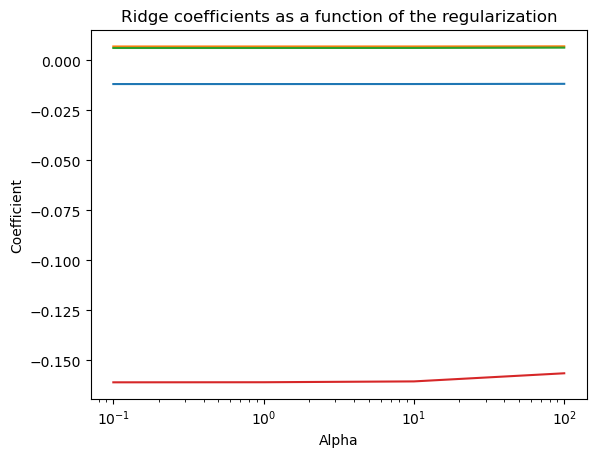

In [11]:
import matplotlib.pyplot as plt

# Define range of alpha values to test
alpha_values = [0.1, 1, 10, 100]

# Initialize array to store mean squared error for each alpha value
mse_scores = []

# Initialize array to store coefficients for each alpha value
coeffs = []

# Loop over each alpha value
for alpha in alpha_values:
    # Calculate mean squared error using K-fold Cross Validation
    mse = kfold_regression(X, Y, alpha, n_folds=5)
    mse_scores.append(mse)
    
    # Train Ridge regression model on entire training data using current alpha value
    model = ridge_regression(X_train, Y_train, alpha)
    coeffs.append(model.coef_)

# Print the mean squared error scores for each alpha value
for i in range(len(alpha_values)):
    print(f"Alpha = {alpha_values[i]}: Mean Squared Error = {mse_scores[i]}")

# Plot the coefficients of the Ridge regression model against the range of alpha values
plt.figure()
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Ridge coefficients as a function of the regularization')
plt.plot(alpha_values, coeffs)
plt.show()

In [12]:
# Create prediction model based on Ridge regression model with lowest mean squared error
min_mse_index = np.argmin(mse_scores)
min_mse_alpha = alpha_values[min_mse_index]
model = ridge_regression(X, Y, min_mse_alpha)

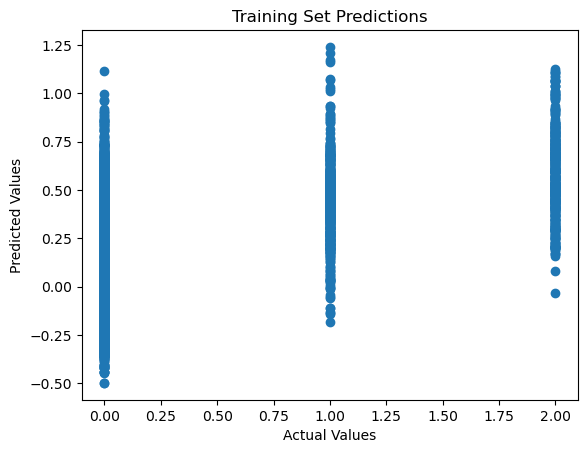

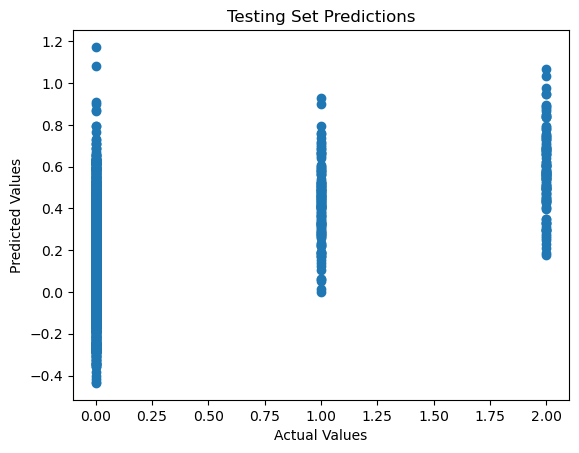

In [13]:
import matplotlib.pyplot as plt

# Fit Ridge Regression model on training data
model = ridge_regression(X, Y, min_mse_alpha)

# Predict on training and testing data
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Plot the predicted vs. actual values for the training set
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Set Predictions")
plt.show()

# Plot the predicted vs. actual values for the testing set
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Testing Set Predictions")
plt.show()
